# Basic geometric operations on 2D objects typically include operations such as translation (moving the object), rotation, scaling, and reflection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define a square as a list of vertices (x, y)
square_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Function to plot a polygon
def plot_polygon(vertices, title):
    fig, ax = plt.subplots()
    ax.add_patch(Polygon(vertices, closed=True, fill=True, edgecolor='darkgreen'))
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(title)
    ax.grid(True)
    plt.show()

# Translation: Move the square by (tx, ty)
def translate(vertices, tx, ty):
    return vertices + np.array([tx, ty])

# Rotation: Rotate the square by angle theta (in radians) around the origin
def rotate(vertices, theta):
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    return np.dot(vertices, rotation_matrix)

# Scaling: Scale the square by factors sx and sy
def scale(vertices, sx, sy):
    return vertices * np.array([sx, sy])

# Reflection: Reflect the square about the x-axis or y-axis
def reflect(vertices, axis='x'):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0],
                                       [0, -1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0],
                                       [0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    return np.dot(vertices, reflection_matrix)



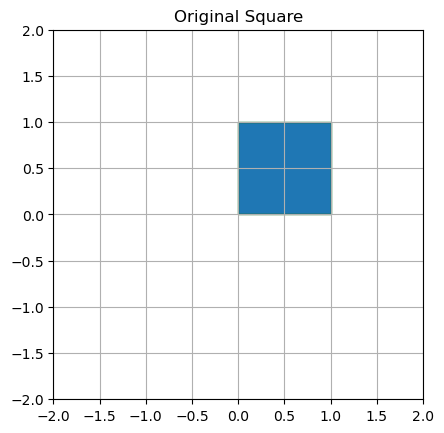

In [26]:
# Plot the original square
plot_polygon(square_vertices, "Original Square")




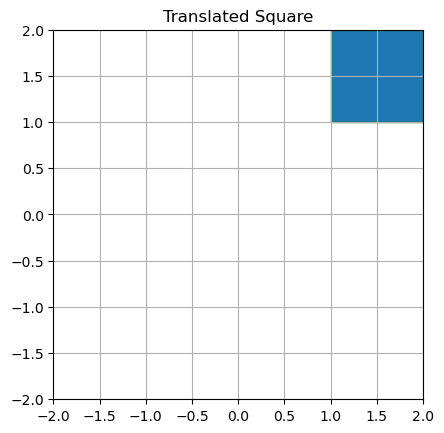

In [27]:
# Translate the square
translated_square = translate(square_vertices, 1, 1)
plot_polygon(translated_square, "Translated Square")



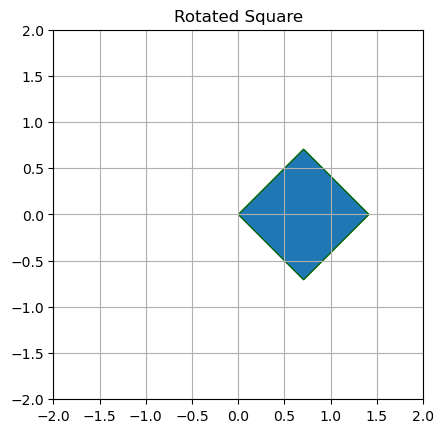

In [28]:
# Rotate the square
rotated_square = rotate(square_vertices, np.pi/4)  # Rotate by 45 degrees (pi/4 radians)
plot_polygon(rotated_square, "Rotated Square")



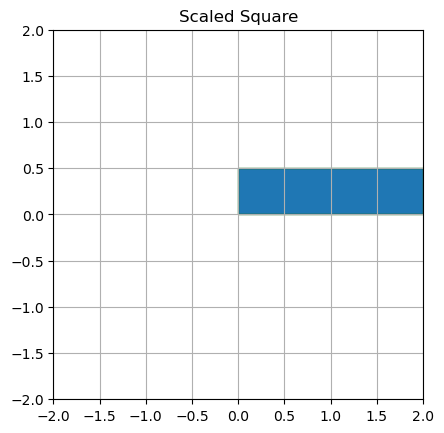

In [29]:
# Scale the square
scaled_square = scale(square_vertices, 2, 0.5)  # Scale by factor of 2 in x-direction, 0.5 in y-direction
plot_polygon(scaled_square, "Scaled Square")



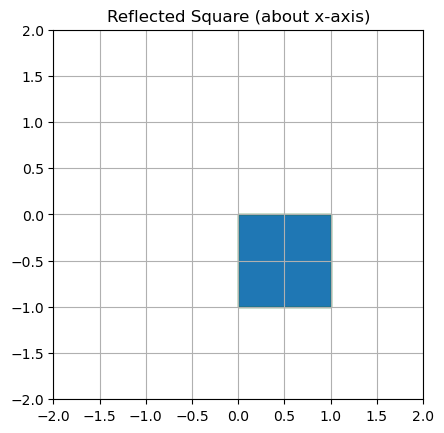

In [30]:
# Reflect the square about the x-axis
reflected_x_square = reflect(square_vertices, axis='x')
plot_polygon(reflected_x_square, "Reflected Square (about x-axis)")




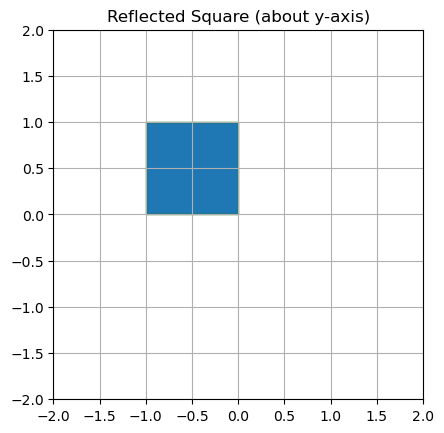

In [31]:
# Reflect the square about the y-axis
reflected_y_square = reflect(square_vertices, axis='y')
plot_polygon(reflected_y_square, "Reflected Square (about y-axis)")

# Basic 3D Operations on 3D objects

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [35]:
# Define the vertices of a cube
cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

In [36]:
# Function to plot a 3D cube
def plot_cube(vertices, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Draw edges
    for i in range(4):
        ax.plot3D(*zip(vertices[i], vertices[(i+1)%4]), color='b')
        ax.plot3D(*zip(vertices[i+4], vertices[((i+1)%4)+4]), color='b')
        ax.plot3D(*zip(vertices[i], vertices[i+4]), color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

In [37]:
# Translation: Move the cube by (tx, ty, tz)
def translate(vertices, tx, ty, tz):
    translation_matrix = np.array([[1, 0, 0, tx],
                                   [0, 1, 0, ty],
                                   [0, 0, 1, tz],
                                   [0, 0, 0, 1]])
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    translated_vertices = np.dot(translation_matrix, homogeneous_vertices.T).T[:, :3]
    return translated_vertices

In [38]:
# Rotation: Rotate the cube by angles (rx, ry, rz) around the x, y, and z axes respectively
def rotate(vertices, rx, ry, rz):
    rotation_matrix_x = np.array([[1, 0, 0],
                                  [0, np.cos(rx), -np.sin(rx)],
                                  [0, np.sin(rx), np.cos(rx)]])
    rotation_matrix_y = np.array([[np.cos(ry), 0, np.sin(ry)],
                                  [0, 1, 0],
                                  [-np.sin(ry), 0, np.cos(ry)]])
    rotation_matrix_z = np.array([[np.cos(rz), -np.sin(rz), 0],
                                  [np.sin(rz), np.cos(rz), 0],
                                  [0, 0, 1]])

    rotation_matrix = np.dot(rotation_matrix_z, np.dot(rotation_matrix_y, rotation_matrix_x))
    rotated_vertices = np.dot(rotation_matrix, vertices.T).T
    return rotated_vertices

In [39]:
# Scaling: Scale the cube by factors (sx, sy, sz) along the x, y, and z axes respectively
def scale(vertices, sx, sy, sz):
    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, sz]])
    scaled_vertices = np.dot(vertices, scaling_matrix.T)
    return scaled_vertices

In [40]:
# Reflection: Reflect the cube about the xy, yz, or zx plane
def reflect(vertices, plane='xy'):
    reflection_matrix = np.eye(3)
    if 'x' in plane:
        reflection_matrix[0, 0] = -1
    if 'y' in plane:
        reflection_matrix[1, 1] = -1
    if 'z' in plane:
        reflection_matrix[2, 2] = -1
    reflected_vertices = np.dot(vertices, reflection_matrix)
    return reflected_vertices

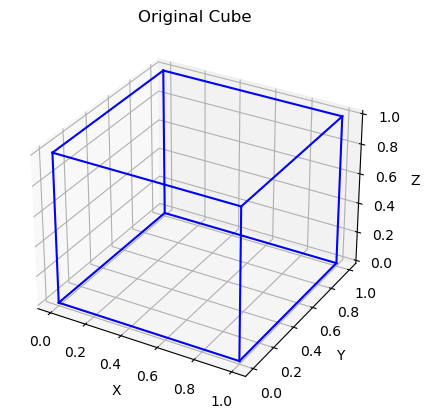

In [41]:
# Plot the original cube
plot_cube(cube_vertices, "Original Cube")


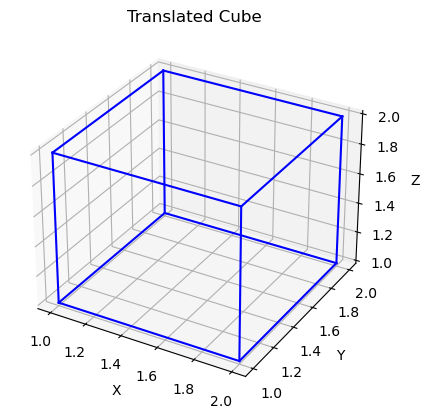

In [42]:
# Translate the cube
translated_cube = translate(cube_vertices, 1, 1, 1)
plot_cube(translated_cube, "Translated Cube")


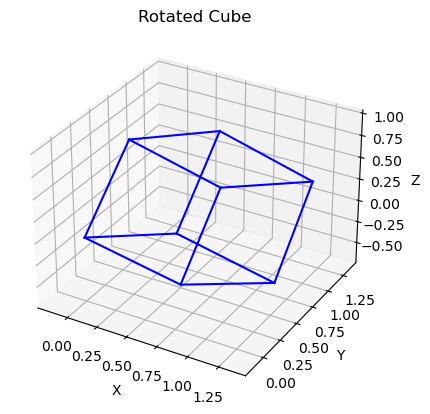

In [43]:
# Rotate the cube
rotated_cube = rotate(cube_vertices, np.pi/4, np.pi/4, np.pi/4)
plot_cube(rotated_cube, "Rotated Cube")


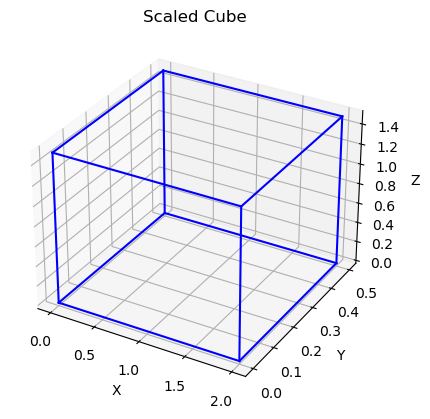

In [44]:
# Scale the cube
scaled_cube = scale(cube_vertices, 2, 0.5, 1.5)
plot_cube(scaled_cube, "Scaled Cube")

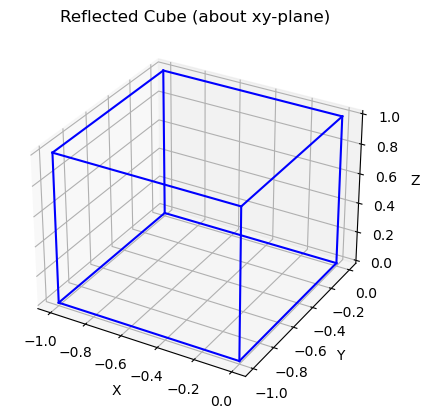

In [45]:
# Reflect the cube about the xy plane
reflected_cube = reflect(cube_vertices, 'xy')
plot_cube(reflected_cube, "Reflected Cube (about xy-plane)")


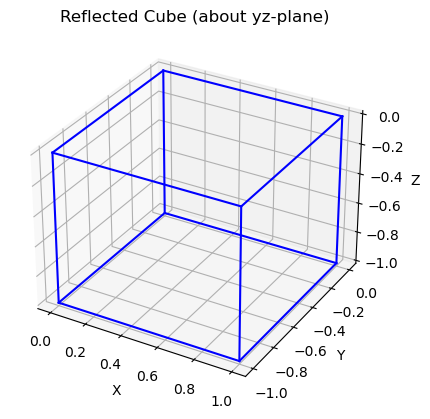

In [46]:
# Reflect the cube about the yz plane
reflected_cube_yz = reflect(cube_vertices, 'yz')
plot_cube(reflected_cube_yz, "Reflected Cube (about yz-plane)")


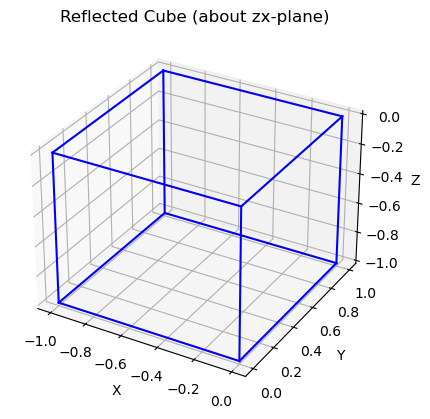

In [47]:
# Reflect the cube about the zx plane
reflected_cube_zx = reflect(cube_vertices, 'zx')
plot_cube(reflected_cube_zx, "Reflected Cube (about zx-plane)")